In [8]:
import os
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from data_scripts.segmentation_generator import SegmentationGenerator
from data_scripts.data_loader import DataLoader

In [2]:

BASE_DIR = os.getcwd()
DATA_DIR = os.path.join(BASE_DIR, "data")
PASCAL_ROOT = os.path.join(DATA_DIR, "VOC2012")
IMGS_PATH = os.path.join(PASCAL_ROOT, "JPEGImages")

SEED = np.random.randint(0, 1000)
IMG_SIZE = (512, 512)
BATCH_SIZE = 1
BUFFER_SIZE = 1000
EPOCHS = 30

In [10]:

#train_generator = SegmentationGenerator(root_folder=PASCAL_ROOT, mode="train", n_classes=21, resize_shape=IMG_SIZE, seed=SEED)
dataloader = DataLoader(root_folder=PASCAL_ROOT, mode="train", image_size=IMG_SIZE, channels=(3, 1), augment=False, compose=False, seed=SEED)
train_generator = dataloader.data_batch(batch_size=BATCH_SIZE, shuffle=True)


In [11]:
for images, masks in train_generator.take(2):
    sample_image, sample_mask = images[0], masks[0]
    #plot_prediction([sample_image, sample_mask])

In [ ]:
i = np.random.randint(0, len(train_generator))
x,y  = train_generator.__getitem__(i)
image = x[0]
mask = y[0].reshape((IMG_SIZE, IMG_SIZE))

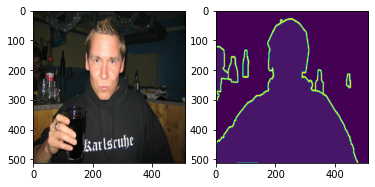

In [12]:
plt.subplot(1, 2, 1)
plt.imshow(tf.keras.preprocessing.image.array_to_img(sample_image))
plt.subplot(1, 2, 2)
plt.imshow(tf.keras.preprocessing.image.array_to_img(sample_mask))

In [13]:
np.unique(sample_mask)

array([  0,   5,  15, 255], dtype=uint8)